In [ ]:
import numpy as np
import pandas as pd

In [ ]:
coffee_data = pd.read_csv("C:/Users/54321/OneDrive/Documents/Desktop/Unified Intern/Coffee Sales Project/index.csv")

In [ ]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
coffee_data['date']= pd.to_datetime(coffee_data['date'])
coffee_data['datetime']= pd.to_datetime(coffee_data['datetime'])
coffee_data.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [ ]:
coffee_data['card'].fillna('CASH', inplace=True)
coffee_data.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [ ]:
coffee_data['month'] = coffee_data['datetime'].dt.month
coffee_data['day_of_week'] = coffee_data['datetime'].dt.day_name()
coffee_data['hour'] = coffee_data['datetime'].dt.hour
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day_of_week,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,Friday,13


In [ ]:
coffee_data.to_csv('cleaned_index.csv', index=False)
print("Cleaned data saved as 'Cleaned_Index.csv'")

Cleaned data saved as 'Cleaned_Index.csv'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
coffee_data = pd.read_csv('cleaned_index.csv')

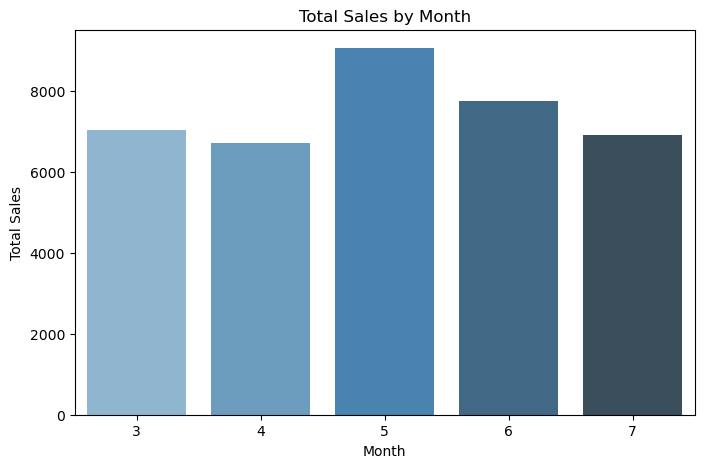

In [ ]:
#Total Sales by Month
monthly_sales = coffee_data.groupby('month')['money'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_sales, x='month', y='money', palette='Blues_d')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

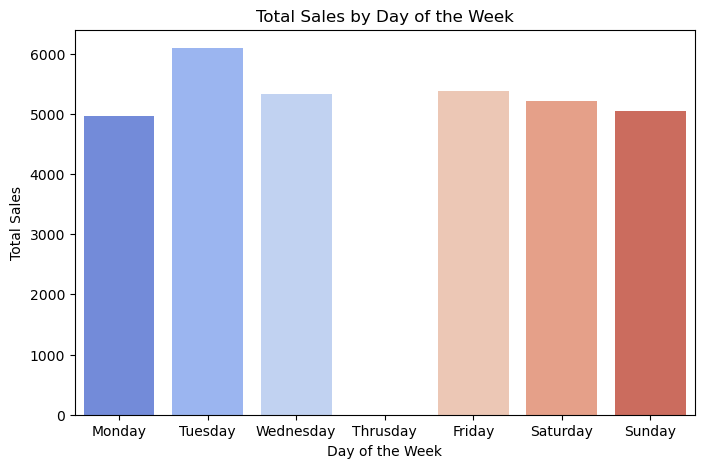

In [ ]:
# Total sales by day of the week
weekly_sales = coffee_data.groupby('day_of_week')['money'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=weekly_sales,x='day_of_week',y='money',order = ['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'],palette = 'coolwarm')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

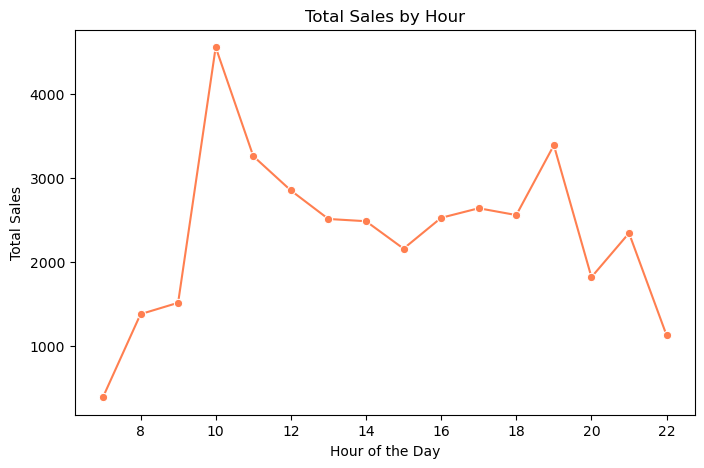

In [ ]:
#Total sales by Hour
hourly_sales = coffee_data.groupby('hour')['money'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_sales, x='hour', y='money', marker='o', color='coral')
plt.title('Total Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()

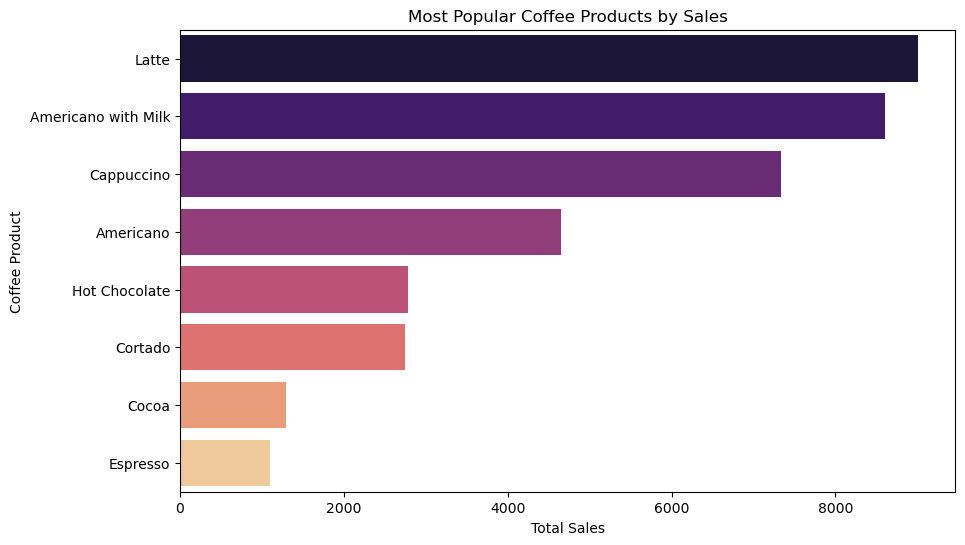

In [ ]:
#Most popular coffee products by sales
product_sales = coffee_data.groupby('coffee_name')['money'].sum().reset_index().sort_values(by = 'money', ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(data = product_sales,x='money',y='coffee_name',palette = 'magma')
plt.title('Most Popular Coffee Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Coffee Product')
plt.show()

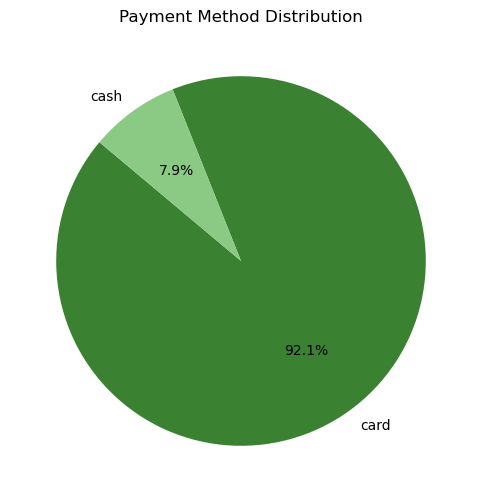

In [ ]:
# Payment method distribution
pay_dist =coffee_data['cash_type'].value_counts()
plt.figure(figsize=(6,6))
pay_dist.plot(kind = 'pie', autopct = '%1.1f%%',colors = ['#3b8132','#8bca84'], startangle = 140)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

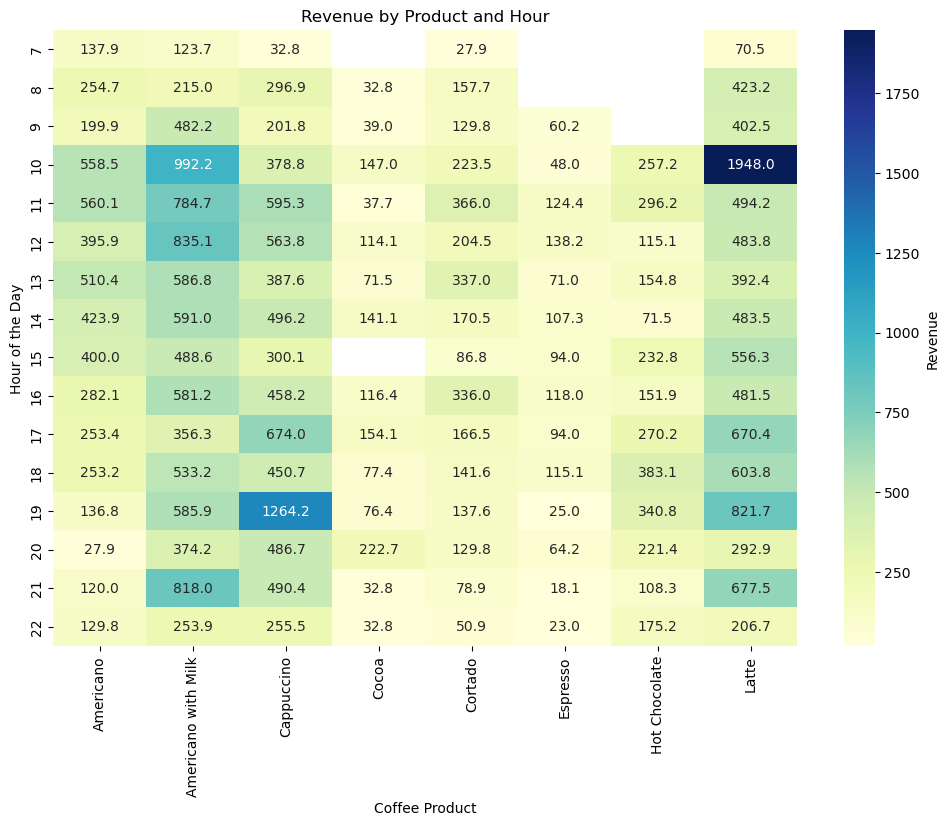

In [ ]:
#Revenue By Product and Hour

#Group by product and hour
hourly_prod_sales = coffee_data.groupby(['hour', 'coffee_name'])['money'].sum().unstack()

#Plot revenue heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_prod_sales, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Revenue'})
plt.title('Revenue by Product and Hour')
plt.xlabel('Coffee Product')
plt.ylabel('Hour of the Day')
plt.show()


In [ ]:
# Convert 'date' to datetime if not already
coffee_data['date'] = pd.to_datetime(coffee_data['date'])

# Set the 'date' column as the index for resampling
coffee_data.set_index('date', inplace=True)

# Resample the data to monthly frequency and aggregate by product
monthly_product_sales = coffee_data.resample('M').sum()  # Aggregating by month
monthly_product_sales_by_product = coffee_data.groupby([pd.Grouper(freq='M'), 'coffee_name'])['money'].sum().unstack()

# Verify the data
monthly_product_sales_by_product.head()


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
date,,,,,,,,
2024-03-31,1044.80,1154.00,780.50,232.20,869.20,241.00,854.00,1874.50
2024-04-30,1001.94,1407.74,1659.44,232.82,548.48,171.00,506.02,1193.12
2024-05-31,1348.80,1908.28,2078.44,340.76,474.64,185.14,529.36,2198.00
2024-06-30,390.88,2268.12,1735.12,189.88,530.48,230.20,528.08,1886.00
2024-07-31,858.12,1863.80,1079.64,300.28,322.28,273.28,361.02,1857.52


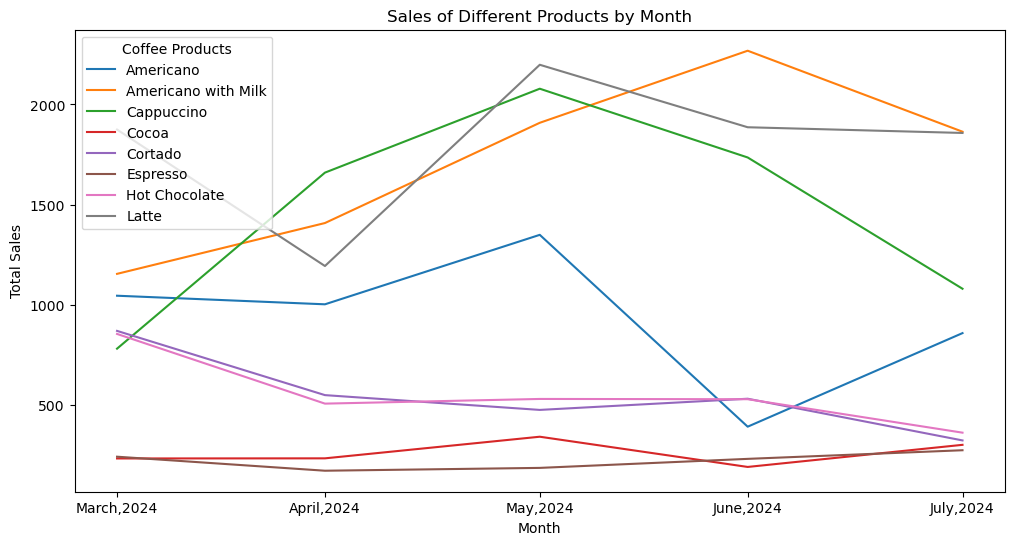

In [ ]:
# Plot the sales of different products across months
plt.figure(figsize=(12, 6))
for product in monthly_product_sales_by_product.columns:
    plt.plot(monthly_product_sales_by_product.index, monthly_product_sales_by_product[product], label=product)

# Add labels and title
plt.title('Sales of Different Products by Month')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.legend(title='Coffee Products')

# Format x-axis to show month names
plt.xticks(monthly_product_sales_by_product.index, monthly_product_sales_by_product.index.strftime('%B,%Y'), rotation=0)
plt.show()


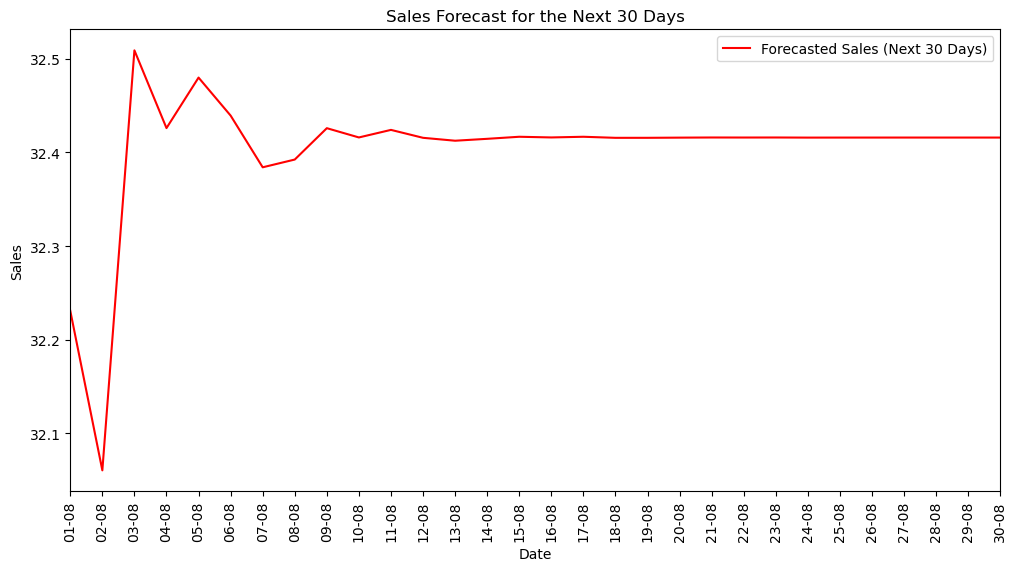

In [ ]:
#Sales forecast for next 30 days
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust (p, d, q) as needed)
model = ARIMA(daily_sales, order=(5, 1, 0))  # You can adjust the (p, d, q) values
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Create forecast index for the next 30 days
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the actual and forecasted sales
plt.figure(figsize=(12, 6))
forecast_series.plot(label='Forecasted Sales (Next 30 Days)', color='red', legend=True)
plt.title('Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(forecast_series.index, forecast_series.index.strftime('%d-%m'), rotation=90)
plt.show()


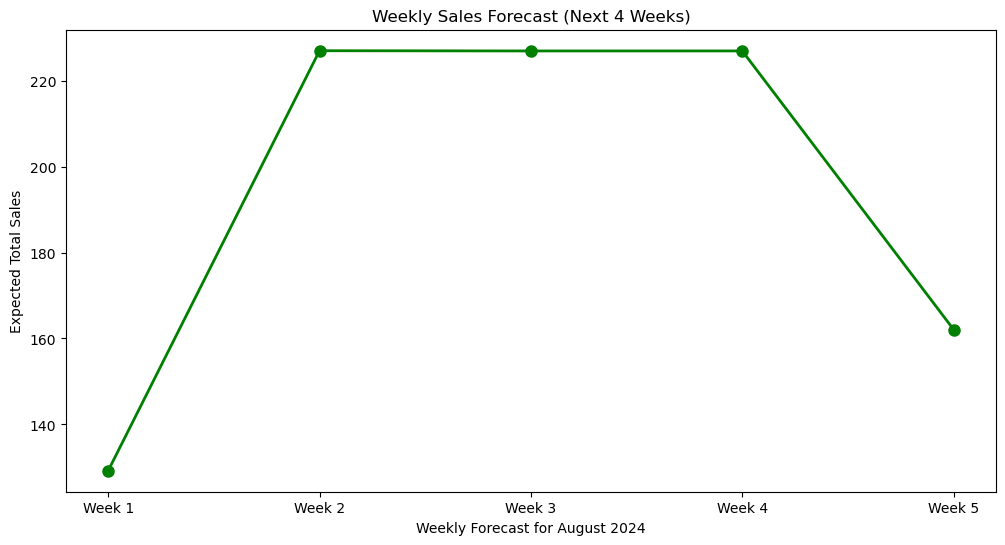

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust (p, d, q) as needed)
model = ARIMA(daily_sales, order=(5, 1, 0))  # Adjust the (p, d, q) values
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Create forecast index for the next 30 days
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)

# Resample the forecasted data to weekly frequency (sum up sales in each week)
weekly_forecast = forecast_series.resample('W').sum()

# Create week labels (Week 1, Week 2, etc.)
week_labels = [f"Week {i+1}" for i in range(len(weekly_forecast))]

# Plot the weekly forecasted sales as a line plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_forecast.index, weekly_forecast, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Weekly Sales Forecast (Next 4 Weeks)')
plt.xlabel('Weekly Forecast for August 2024')
plt.ylabel('Expected Total Sales')
plt.xticks(ticks=weekly_forecast.index, labels=week_labels, rotation=0)
plt.show()


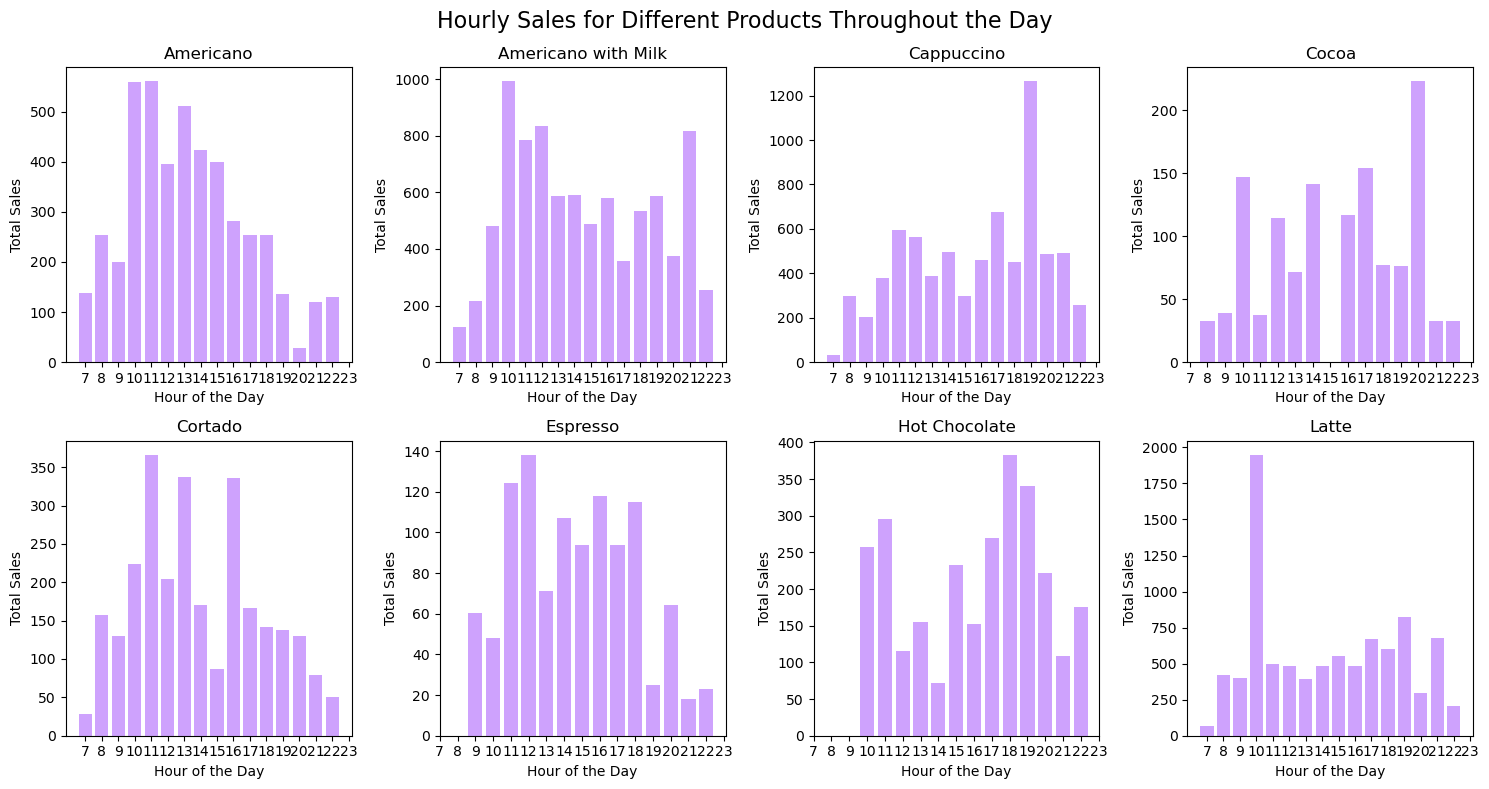

In [ ]:
#Hourly Sales of Different products
import matplotlib.pyplot as plt

# Aggregate sales by hour and product (coffee_name)
product_hourly_sales = coffee_data.groupby(['hour', 'coffee_name'])['money'].sum().unstack()
# Number of products (adjust as needed)
num_products = len(product_hourly_sales.columns)

# Create subplots with 2 rows and 4 columns
num_rows = 2
num_cols = 4
# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()
# Loop through each product and plot it in the respective subplot
for i, product in enumerate(product_hourly_sales.columns):
    axes[i].bar(product_hourly_sales.index, product_hourly_sales[product], color='#cea2fd')
    
    # Customize each subplot
    axes[i].set_title(f'{product}')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Total Sales')
    axes[i].set_xticks(range(7,24))  # Ensure the x-axis shows hours from 0 to 23
fig.suptitle('Hourly Sales for Different Products Throughout the Day', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()
